In [54]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import tensorflow_hub as hub

from matplotlib import font_manager                                                  # 한글 적용 시킬 때 사용..!
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D   # 완전연결층, 최댓값풀링, 평균값풀링
from tensorflow.keras.models import Sequential                                       # 순차적으로 쌓는 모델
from tensorflow.keras.applications import ResNet50                                   # 가중치가 선행 학습된 모델
from tensorflow.keras.preprocessing.image import ImageDataGenerator                  # 크기가 다른 이미지 파일 동일한 크기로 편집

In [55]:
# 사전 훈련된 모델
model = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5",
                      input_shape = (224,224,3),
                      trainable = False),
        tf.keras.layers.Dense(6, activation = 'softmax')
])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              58331648  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 12294     
Total params: 58,343,942
Trainable params: 12,294
Non-trainable params: 58,331,648
_________________________________________________________________


In [57]:
# 환경설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [58]:
# 모델 훈련
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = 'C:/AI/animal/train'
valid_dir = 'C:/AI/animal/validation'

train = ImageDataGenerator(
                rescale=1/255,
                rotation_range=10,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1)

valid = ImageDataGenerator(rescale=1/255)
train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode='categorical')

valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode='categorical')


Found 1106 images belonging to 6 classes.
Found 276 images belonging to 6 classes.


In [59]:
history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=2)

Epoch 1/10
35/35 - 137s - loss: 0.5278 - accuracy: 0.8137 - val_loss: 0.0652 - val_accuracy: 0.9891
Epoch 2/10
35/35 - 136s - loss: 0.0462 - accuracy: 0.9882 - val_loss: 0.0298 - val_accuracy: 0.9928
Epoch 3/10
35/35 - 136s - loss: 0.0351 - accuracy: 0.9910 - val_loss: 0.0280 - val_accuracy: 0.9928
Epoch 4/10
35/35 - 130s - loss: 0.0225 - accuracy: 0.9955 - val_loss: 0.0207 - val_accuracy: 0.9928
Epoch 5/10
35/35 - 129s - loss: 0.0181 - accuracy: 0.9964 - val_loss: 0.0250 - val_accuracy: 0.9928
Epoch 6/10
35/35 - 146s - loss: 0.0124 - accuracy: 0.9991 - val_loss: 0.0272 - val_accuracy: 0.9928
Epoch 7/10
35/35 - 130s - loss: 0.0121 - accuracy: 0.9991 - val_loss: 0.0145 - val_accuracy: 0.9928
Epoch 8/10
35/35 - 129s - loss: 0.0080 - accuracy: 0.9991 - val_loss: 0.0194 - val_accuracy: 0.9928
Epoch 9/10
35/35 - 129s - loss: 0.0068 - accuracy: 0.9991 - val_loss: 0.0109 - val_accuracy: 0.9928
Epoch 10/10
35/35 - 129s - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.0181 - val_accuracy: 0.9928

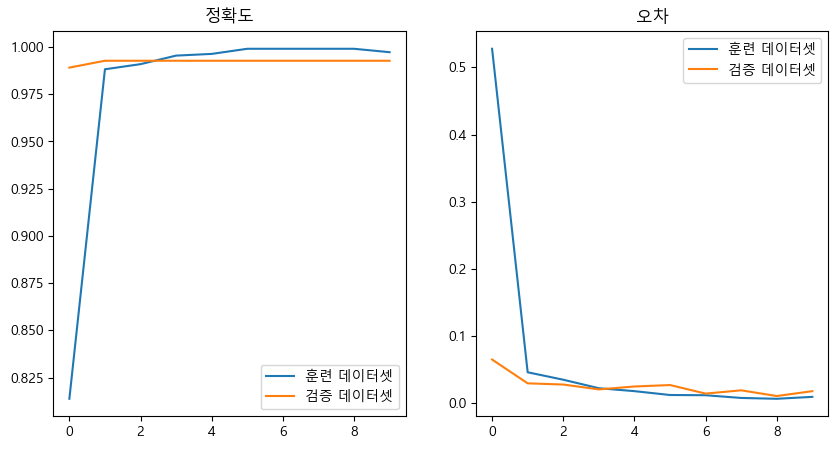

In [60]:
# 모델의 정확도 시각화

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams['font.family'] = font_family        # 글꼴 적용

accuracy = history.history['accuracy']           # 훈련 정확도 추출
val_accuracy = history.history['val_accuracy']   # 검증 정확도 추출

loss = history.history['loss']                   # 훈련 오차 추출
val_loss = history.history['val_loss']           # 검증 오차 추출

epochs = range(len(accuracy))                    # 0~9

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, label='훈련 데이터셋')
plt.plot(epochs, val_accuracy, label='검증 데이터셋')
plt.legend()
plt.title('정확도')

plt.subplot(1,2,2)
plt.plot(epochs, loss, label='훈련 데이터셋')
plt.plot(epochs, val_loss, label='검증 데이터셋')
plt.legend()
plt.title('오차')

plt.show()

In [61]:
prediction_values.shape

(32,)

In [62]:
model.predict(validation)[0]

array([9.9981982e-01, 1.0284440e-05, 1.3565173e-05, 4.0043029e-05,
       1.2076775e-05, 1.0431518e-04], dtype=float32)

In [63]:
prediction_values[0]

0

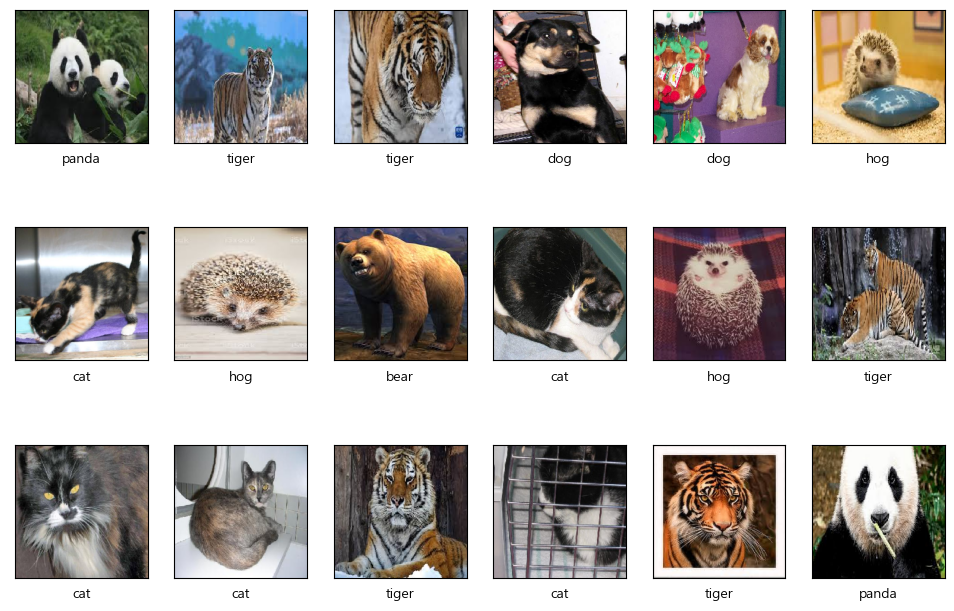

In [64]:
class_names = ['bear','cat', 'dog','hog','panda','tiger']
validation, label_batch = next(iter(valid_generator))      # 반복(반복자(리스트 반환 가능 객체)), 
prediction_values = np.argmax(model.predict(validation), axis=-1)   # 검증데이터를 이용해서 예측 

fig = plt.figure(figsize=(12,8))

for i in range(18):
    plt.subplot(3, 6, i+1)
    plt.imshow(validation[i])
    plt.xticks([])
    plt.yticks([])
    if prediction_values[i] == np.argmax(label_batch[i]):
        plt.xlabel(class_names[prediction_values[i]])
    else :
        plt.xlabel(class_names[1 - prediction_values[i]])
    
plt.show()